In [1]:
pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 4.3 MB/s 


In [2]:
pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=093b535d67b106b84b1fb1839ea0af344401ef5388673dc05b5aee2c025e4a48
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [18]:
import talib
import pandas_ta as ta
import pandas as pd  # pip install pandas
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib.pyplot import figure
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [49]:
def dataset_import():
    dataset = pd.read_csv('/content/drive/MyDrive/Datasets_H1/MAIN_H1_with_time.csv')
    dataset['time'] = pd.to_datetime(dataset['time'], unit='s', utc=True)#.view(np.int64) // 10**9
    # dataset.set_index('time', inplace=True)
    dataset = dataset.drop(['Unnamed: 0'], axis=1)
    dataset['log_rtn'] = np.log(dataset.close/dataset.close.shift(1))
    dataset['Roll_max_5'] = dataset['log_rtn'].rolling(5).sum().shift(-5)
    # dataset = dataset.dropna() 
    dataset.loc[dataset["Roll_max_5"] > 0.002, "Label"] = 1
    dataset.loc[dataset["Roll_max_5"] < -0.002, "Label"] = 2             
    dataset.loc[(dataset["Roll_max_5"] >= -0.002) & (dataset["Roll_max_5"] <= 0.002), "Label"] = 0               
    dataset = dataset.astype({"Label": "Int64"})
    
    # dataset['Roll_max_10'] = dataset['log_rtn'].rolling(5).sum().shift(-10)
    # dataset.loc[dataset["Roll_max_10"] > 0.004, "Label"] = 3
    # dataset.loc[dataset["Roll_max_10"] < -0.004, "Label"] = 4             
    # dataset.loc[(dataset["Roll_max"] >= -0.004) & (dataset["Roll_max"] <= 0.004), "Label"] = 0               
    # dataset = dataset.astype({"Label": "Int64"})
    
    open = dataset['open']
    high = dataset['high']
    low = dataset['low']
    close = dataset['close']
    # dataset['EMA_24'] = talib.EMA(close, timeperiod=24)
    # dataset['EMA_60'] = talib.EMA(close, timeperiod=60)
    # dataset['EMA_120'] = talib.EMA(close, timeperiod=120)
    
    # dataset['upperband'], dataset['middleband'], dataset['lowerband'] = talib.BBANDS(close, timeperiod=24, 
    #                                                                                  nbdevup=8, nbdevdn=8, matype=0)    
    # dataset['HT_TRENDLINE'] = talib.HT_TRENDLINE(close)
    # dataset['TEMA'] = talib.TEMA(close, timeperiod=24)
    # dataset['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=24)
    # dataset['macd'], dataset['macdsignal'], dataset['macdhist'] = talib.MACD(close, fastperiod=12, 
    #                                                                          slowperiod=24, signalperiod=9)
    # dataset['RSI'] = talib.RSI(close, timeperiod=24)
    # dataset['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
    # dataset['HT_DCPHASE'] = talib.HT_DCPHASE(close)
    # dataset['HT_TRENDMODE'] = talib.HT_TRENDMODE(close)
    # dataset['NATR'] = talib.NATR(high, low, close, timeperiod=24)
    dataset = dataset.drop(['log_rtn', 'Roll_max_5'], axis=1)
    # dataset = dataset[['Label4', 'open', 'high', 'low', 'close', 'EMA_24', 'EMA_60', 'EMA_120',
    #                    'STOCHRSIk_14_14_3_3', 'STOCHRSId_14_14_3_3', 'atr', 
    #                    'atr1', 'FISHERT_10_1', 'FISHERTs_10_1', 'AROONOSC', 'upperband', 'middleband', 'lowerband', 
    #                    'macd', 'macdsignal', 'macdhist', 'NATR', 'TEMA']]
    #   'HT_TRENDLINE', 'TEMA', 'AROONOSC', 'RSI', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_TRENDMODE', 'NATR' 
    dataset = dataset[[col for col in dataset.columns if col != 'Label'] + ['Label']] # перенос столбца LABEL вначало
         
    dataset = dataset.dropna() 
    # dataset = dataset.set_index('time')
    return dataset

In [50]:
dataset = dataset_import()
dataset = dataset.reset_index()
dataset = dataset.drop(['index'], axis=1)

In [51]:
dataset.loc[dataset["time"] == '2002-01-01 00:00:00+00:00']

,time,open,high,low,close,volume,Label
18502,2002-01-01 00:00:00+00:00,0.8897,0.8897,0.8897,0.8897,1,2


In [52]:
exp = dataset[18502:].reset_index()

In [ ]:
# exp = exp.drop([3485]).reset_index()

In [53]:
exp = exp.drop(['index', 'open', 'high', 'low', 'close', 'volume' ], axis=1)

In [106]:
exp = exp[:128130]

In [109]:
exp.to_csv('/content/drive/MyDrive/Datasets_H1/Raw_target_h1.csv', index=False)

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Datasets_H1/FOR_TRADE_1.csv', index=False)

In [7]:
listnames = pd.read_csv('/content/drive/MyDrive/Datasets_H1/listnames.csv')
target_list = pd.read_csv('/content/drive/MyDrive/Datasets_H1/Raw_target_h1.csv')

In [9]:
targets = pd.concat((listnames, target_list), ignore_index=True, axis=1)

In [12]:
targets = targets.drop([1], axis=1)

In [14]:
targets.rename({0: 'filename', 2: 'Label'}, inplace=True, axis=1)

In [17]:
targets.to_csv('/content/drive/MyDrive/Datasets_H1/targets.csv', index=False)

In [16]:
targets['Label'].value_counts()

0    89028
1    19580
2    19522
Name: Label, dtype: int64

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

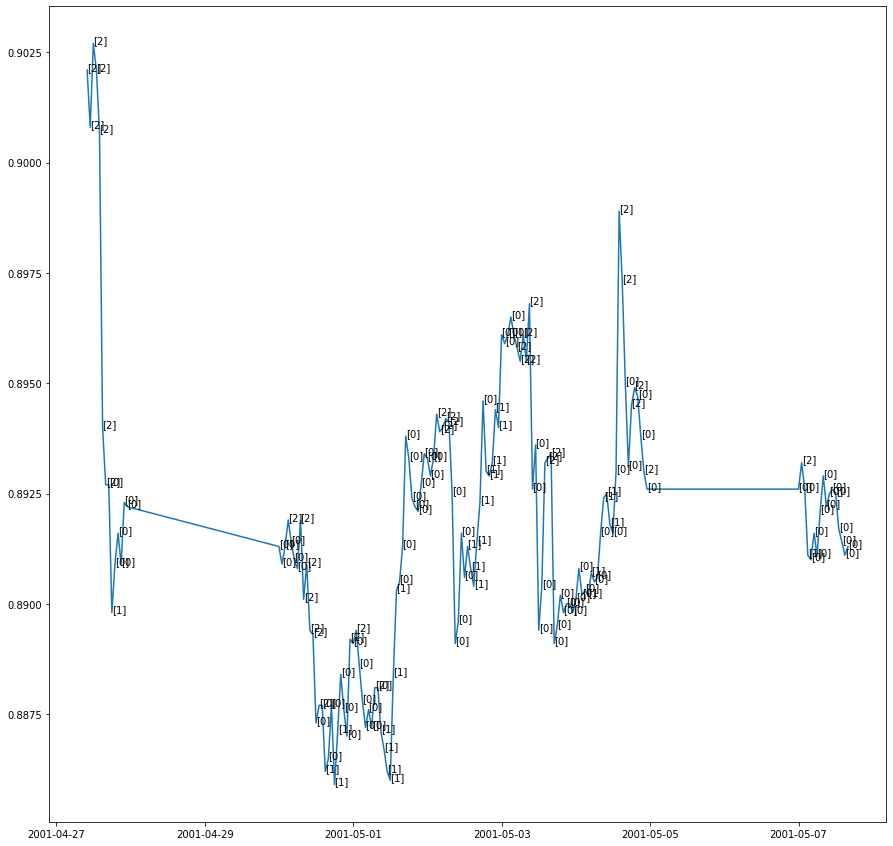

In [ ]:
import matplotlib.pyplot as plt
exp.reset_index(inplace=True)
b = exp[['Label']][13675:13826]
b = b.to_numpy()
a = exp[['close']][13675:13826] 
c = exp[['time']][13675:13826]
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(c,a)
 
for i, txt in enumerate(b):
    ax.annotate(txt, (c.iloc[i], a.iloc[i]))

plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data.csv', header='infer', delimiter=';' )

In [ ]:
data = data.drop(['Path', 'Size', 'Date modified', 'Image size', 'Album', 'Song name', 'Bitrate', 'Track length', 'Year', 'Unnamed: 12', 'Artist'], axis=1)

In [ ]:
data['for_del'] = data.duplicated(subset=['Group'])

In [ ]:
data1 = data.loc[data["for_del"] == True]